In [2]:
# prompt: using networkx and nxviz, access the .csv on files and create a graph of the medicamentos (nodes) where edges between two nodes will exist if they share the same principio ativo

!pip install networkx
!pip install nxviz

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import circos

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


Assortatividade com base na categoria regulatória: 0.36022898461592506


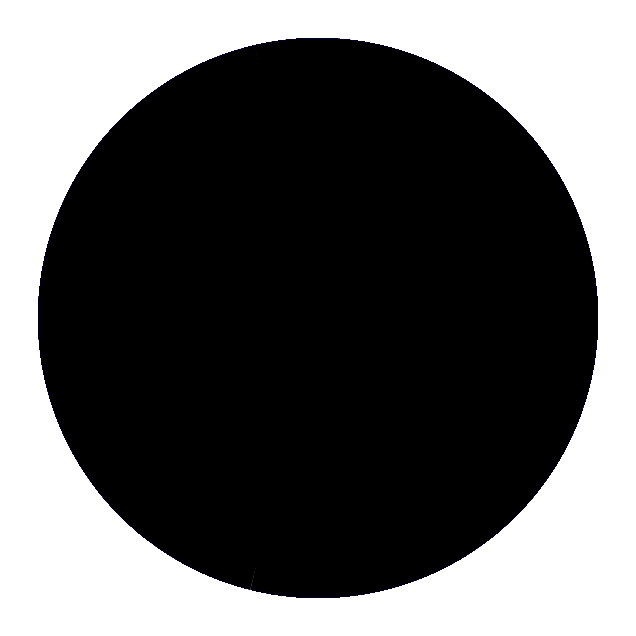

In [5]:
# Ler apenas as colunas necessárias do CSV
df = pd.read_csv('medicamentos.csv',
                 encoding='Windows-1252',
                 delimiter=';',
                 usecols=['NOME_PRODUTO', 'CATEGORIA_REGULATORIA', 'PRINCIPIO_ATIVO'])

# Filtrar os medicamentos onde PRINCIPIO_ATIVO não é nulo ou vazio
df_filtrado = df.dropna(subset=['PRINCIPIO_ATIVO'])

# Selecionar 3000 linhas aleatórias
# df_amostra = df_filtrado.sample(n=1000, random_state=1)
df_amostra = df_filtrado
# Criar um grafo vazio
graph = nx.Graph()

# Criar um dicionário para mapear princípios ativos aos medicamentos
principio_ativo_medicamentos = {}

# Preencher o dicionário separando os princípios ativos e mapeando para medicamentos
for idx, row in df_amostra.iterrows():
    principios = [p.strip() for p in row['PRINCIPIO_ATIVO'].split('+')]  # Separar os princípios ativos
    medicamento = row['NOME_PRODUTO']
    categoria_regulatoria = row['CATEGORIA_REGULATORIA']

    # Adicionar nós com atributo de categoria regulatória
    graph.add_node(medicamento, categoria=categoria_regulatoria)

    for principio in principios:
        if principio not in principio_ativo_medicamentos:
            principio_ativo_medicamentos[principio] = []
        principio_ativo_medicamentos[principio].append(medicamento)

# Criar arestas entre medicamentos que compartilham princípios ativos
for medicamentos in principio_ativo_medicamentos.values():
    if len(medicamentos) > 1:
        for i, medicamento1 in enumerate(medicamentos):
            for medicamento2 in medicamentos[i + 1:]:
                graph.add_edge(medicamento1, medicamento2)

# Calcular a assortatividade com base na categoria regulatória
assortativity = nx.attribute_assortativity_coefficient(graph, 'categoria')

print(f"Assortatividade com base na categoria regulatória: {assortativity}")
# Desenhar o grafo utilizando o CircosPlot
plt.figure(figsize=(10, 8))
c = circos(graph)
plt.show()
